In [ ]:
#default_exp noisyimagenette

In [ ]:
#hide
!pip install nbdev -q --upgrade
!pip install fastai -q --upgrade

     |████████████████████████████████| 51kB 5.6MB/s 
     |████████████████████████████████| 61kB 6.7MB/s 
     |████████████████████████████████| 51kB 7.2MB/s 
     |████████████████████████████████| 194kB 20.3MB/s 
     |████████████████████████████████| 776.8MB 24kB/s 
     |████████████████████████████████| 12.8MB 221kB/s 
ERROR: torchtext 0.9.1 has requirement torch==1.8.1, but you'll have torch 1.7.1 which is incompatible.


In [ ]:
from fastcore.test import *

import fastai, fastcore, nbdev
test_eq(['2.3.0', '1.3.19', '1.1.13'], [fastai.__version__, fastcore.__version__, nbdev.__version__])

In [ ]:
#export 
from fastai.vision.all import *
from pathlib import Path

import pandas as pd

In [ ]:
#hide
from nbdev.showdoc import *

In [ ]:
#export
source = untar_data(URLs.IMAGENETTE)
csv_file: pd.DataFrame = pd.read_csv(source/'noisy_imagenette.csv')

In [ ]:
train_df = csv_file[csv_file.is_valid == False]

In [ ]:
len(train_df)

9469

In [ ]:
test_eq(13394, len(csv_file))
expected = ['path', 'noisy_labels_0', 'noisy_labels_1', 'noisy_labels_5', 'noisy_labels_25', 'noisy_labels_50', 'is_valid']

test_eq(expected, list(csv_file.columns))
test_eq(3925, len(csv_file[csv_file['is_valid'] == True]))

In [ ]:
sample = dict(
    is_valid=False,
    noisy_labels_0='n02979186',
    noisy_labels_1='n02979186',
    noisy_labels_25='n02979186',
    noisy_labels_5='n02979186',
    noisy_labels_50='n02979186',
    path='train/n02979186/n02979186_9036.JPEG')

test_eq(sample, dict(csv_file.iloc[0]))

In [ ]:
#export
lbl_dict = dict(
    n01440764='tench',
    n02102040='English springer',
    n02979186='cassette player',
    n03000684='chain saw',
    n03028079='church',
    n03394916='French horn',
    n03417042='garbage truck',
    n03425413='gas pump',
    n03445777='golf ball',
    n03888257='parachute'
)

In [ ]:
#export
set_seed(42, reproducible=True)

In [ ]:
#export
def get_dls(file, noice_pct, size=128):
  dblock = DataBlock(blocks=(ImageBlock, CategoryBlock),
                   get_x=ColReader('path', pref=source),
                   get_y=Pipeline([ColReader(f'noisy_labels_{noice_pct}'), lbl_dict.__getitem__]),
                   splitter=ColSplitter(),
                   item_tfms=[RandomResizedCrop(size, min_scale=0.35), FlipItem(0.5)],
                   batch_tfms=Normalize.from_stats(*imagenet_stats))
  dls = dblock.dataloaders(file)
  return dls

## 5 noice percent

In [ ]:
#export
dls_5 = get_dls(csv_file, 5, size=224)

In [ ]:
b = dls_5.one_batch();
test_eq(2, len(b)) 
test_eq([64, 3, 224, 224], b[0].shape)
test_eq([64], b[1].shape)

In [ ]:
expected = ['English springer', 'French horn', 'cassette player', 'chain saw', 'church', 'garbage truck', 'gas pump', 'golf ball', 'parachute', 'tench']

test_eq(expected, dls_5.valid.vocab)

In [ ]:
len(dls_5.train_ds), len(dls_5.valid_ds)

(9469, 3925)

In [ ]:
x = dls_5.train_ds[0]; x

(PILImage mode=RGB size=500x375, TensorCategory(2))

In [ ]:
dls_5.train.after_item

Pipeline: FlipItem -- {'p': 0.5} -> RandomResizedCrop -- {'size': (224, 224), 'min_scale': 0.35, 'ratio': (0.75, 1.3333333333333333), 'resamples': (2, 0), 'val_xtra': 0.14, 'max_scale': 1.0, 'p': 1.0} -> ToTensor

In [ ]:
dls_5.train.after_batch

Pipeline: IntToFloatTensor -- {'div': 255.0, 'div_mask': 1} -> Normalize -- {'mean': tensor([[[[0.4850]],

         [[0.4560]],

         [[0.4060]]]], device='cuda:0'), 'std': tensor([[[[0.2290]],

         [[0.2240]],

         [[0.2250]]]], device='cuda:0'), 'axes': (0, 2, 3)}

In [ ]:
for f in dls_5.train.after_item:
  name = f.name
  x = f(x)
  print(name, x[0]) 

FlipItem -- {'p': 0.5} PILImage mode=RGB size=500x375
RandomResizedCrop -- {'size': (224, 224), 'min_scale': 0.35, 'ratio': (0.75, 1.3333333333333333), 'resamples': (2, 0), 'val_xtra': 0.14, 'max_scale': 1.0, 'p': 1.0} PILImage mode=RGB size=224x224
ToTensor TensorImage([[[134, 149, 167,  ..., 131, 133, 131],
         [134, 153, 179,  ..., 133, 128, 131],
         [145, 160, 179,  ..., 135, 134, 131],
         ...,
         [215, 212, 210,  ..., 247, 251, 254],
         [216, 217, 215,  ..., 251, 254, 254],
         [217, 220, 222,  ..., 250, 252, 251]],

        [[134, 149, 167,  ..., 131, 133, 131],
         [134, 153, 179,  ..., 133, 128, 131],
         [145, 160, 179,  ..., 135, 134, 131],
         ...,
         [215, 212, 210,  ..., 211, 212, 219],
         [216, 217, 215,  ..., 213, 215, 218],
         [217, 220, 222,  ..., 213, 215, 218]],

        [[134, 149, 167,  ..., 131, 133, 131],
         [134, 153, 179,  ..., 133, 128, 131],
         [145, 160, 179,  ..., 135, 134, 131],

In [ ]:
x[0].shape

torch.Size([3, 224, 224])

In [ ]:
for f in dls_5.train.after_batch:
  name = f.name
  x = f(to_device(x, 'cuda')) #move the data to GPU
  print(name, x[0])

IntToFloatTensor -- {'div': 255.0, 'div_mask': 1} TensorImage([[[0.5255, 0.5843, 0.6549,  ..., 0.5137, 0.5216, 0.5137],
         [0.5255, 0.6000, 0.7020,  ..., 0.5216, 0.5020, 0.5137],
         [0.5686, 0.6275, 0.7020,  ..., 0.5294, 0.5255, 0.5137],
         ...,
         [0.8431, 0.8314, 0.8235,  ..., 0.9686, 0.9843, 0.9961],
         [0.8471, 0.8510, 0.8431,  ..., 0.9843, 0.9961, 0.9961],
         [0.8510, 0.8627, 0.8706,  ..., 0.9804, 0.9882, 0.9843]],

        [[0.5255, 0.5843, 0.6549,  ..., 0.5137, 0.5216, 0.5137],
         [0.5255, 0.6000, 0.7020,  ..., 0.5216, 0.5020, 0.5137],
         [0.5686, 0.6275, 0.7020,  ..., 0.5294, 0.5255, 0.5137],
         ...,
         [0.8431, 0.8314, 0.8235,  ..., 0.8275, 0.8314, 0.8588],
         [0.8471, 0.8510, 0.8431,  ..., 0.8353, 0.8431, 0.8549],
         [0.8510, 0.8627, 0.8706,  ..., 0.8353, 0.8431, 0.8549]],

        [[0.5255, 0.5843, 0.6549,  ..., 0.5137, 0.5216, 0.5137],
         [0.5255, 0.6000, 0.7020,  ..., 0.5216, 0.5020, 0.5137],
   

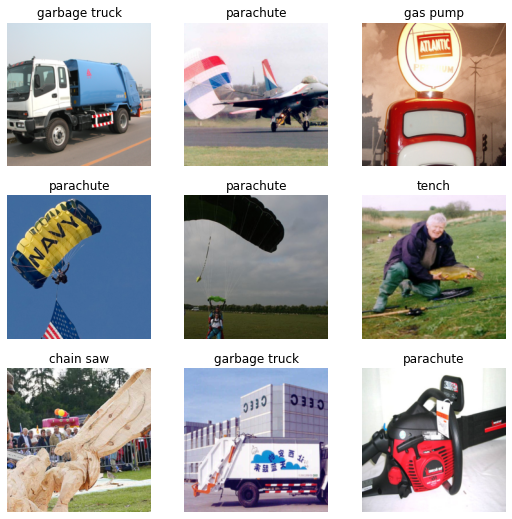

In [ ]:
dls_5.show_batch()

In [ ]:
#export
learn_5 = cnn_learner(dls_5, resnet18, metrics=[accuracy, RocAuc()])

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


SuggestedLRs(lr_min=0.014454397559165954, lr_steep=0.0010000000474974513)

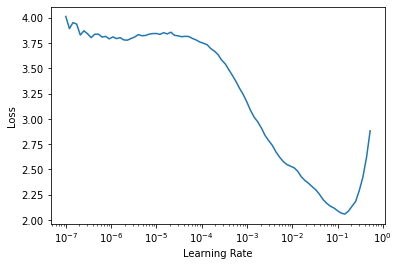

In [ ]:
learn_5.lr_find()

In [ ]:
# Reference: https://walkwithfastai.com/EfficientNet_and_Custom_Weights
# #fastai model can split into layer groups 
# Group 1 -> Encoder ie everything by the last layer of original model
# Group 2 -> Head ie Linear + additional

learn_5.model[-1] #head 

Sequential(
  (0): AdaptiveConcatPool2d(
    (ap): AdaptiveAvgPool2d(output_size=1)
    (mp): AdaptiveMaxPool2d(output_size=1)
  )
  (1): Flatten(full=False)
  (2): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (3): Dropout(p=0.25, inplace=False)
  (4): Linear(in_features=1024, out_features=512, bias=False)
  (5): ReLU(inplace=True)
  (6): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (7): Dropout(p=0.5, inplace=False)
  (8): Linear(in_features=512, out_features=10, bias=False)
)

In [ ]:
show_doc(Learner.fine_tune)

<h4 id="Learner.fine_tune" class="doc_header"><code>Learner.fine_tune</code><a href="https://github.com/fastai/fastai/tree/master/fastai/callback/schedule.py#L151" class="source_link" style="float:right">[source]</a></h4>

> <code>Learner.fine_tune</code>(**`epochs`**, **`base_lr`**=*`0.002`*, **`freeze_epochs`**=*`1`*, **`lr_mult`**=*`100`*, **`pct_start`**=*`0.3`*, **`div`**=*`5.0`*, **`lr_max`**=*`None`*, **`div_final`**=*`100000.0`*, **`wd`**=*`None`*, **`moms`**=*`None`*, **`cbs`**=*`None`*, **`reset_opt`**=*`False`*)

Fine tune with `freeze` for `freeze_epochs` then with `unfreeze` from `epochs` using discriminative LR

In [ ]:
#export
learn_5.fine_tune(epochs=5, base_lr=1e-3, freeze_epochs=3)

epoch,train_loss,valid_loss,accuracy,roc_auc_score,time
0,1.024456,0.125678,0.967643,0.999174,01:36
1,0.637277,0.084399,0.978854,0.999604,01:38
2,0.560432,0.080388,0.977325,0.999680,01:37


epoch,train_loss,valid_loss,accuracy,roc_auc_score,time
0,0.490662,0.078751,0.982675,0.999745,01:41
1,0.470257,0.081340,0.982420,0.999662,01:43
2,0.399871,0.087719,0.981147,0.999660,01:42
3,0.332354,0.082929,0.981401,0.999673,01:41
4,0.282377,0.079524,0.982675,0.999699,01:40


In [ ]:
#export
learn_5.save('learn_5')

Path('models/learn_5.pth')

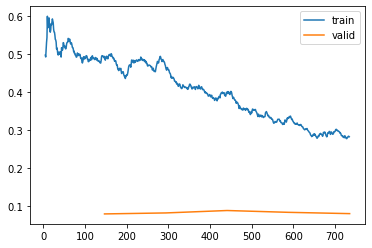

In [ ]:
learn_5.recorder.plot_loss()

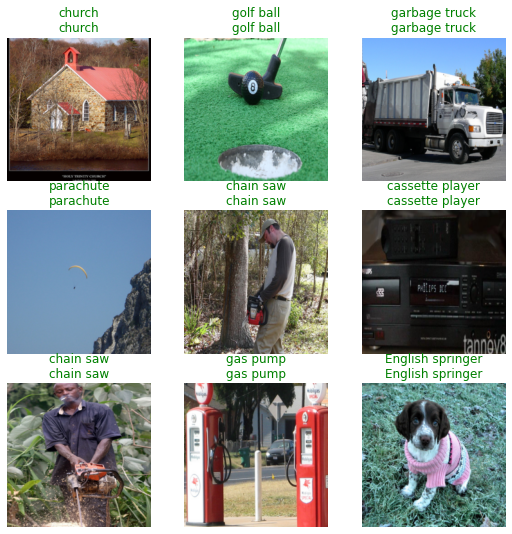

In [ ]:
learn_5.show_results()

In [ ]:
interp = ClassificationInterpretation.from_learner(learn_5)
interp.most_confused()

[('garbage truck', 'gas pump', 5),
 ('chain saw', 'French horn', 4),
 ('chain saw', 'garbage truck', 4),
 ('French horn', 'chain saw', 3),
 ('cassette player', 'chain saw', 3),
 ('gas pump', 'chain saw', 3),
 ('parachute', 'church', 3),
 ('cassette player', 'garbage truck', 2),
 ('chain saw', 'church', 2),
 ('chain saw', 'gas pump', 2),
 ('garbage truck', 'chain saw', 2),
 ('gas pump', 'cassette player', 2),
 ('golf ball', 'parachute', 2),
 ('golf ball', 'tench', 2),
 ('parachute', 'French horn', 2),
 ('parachute', 'tench', 2),
 ('tench', 'chain saw', 2),
 ('French horn', 'cassette player', 1),
 ('French horn', 'garbage truck', 1),
 ('French horn', 'gas pump', 1),
 ('French horn', 'parachute', 1),
 ('French horn', 'tench', 1),
 ('cassette player', 'gas pump', 1),
 ('chain saw', 'English springer', 1),
 ('chain saw', 'cassette player', 1),
 ('chain saw', 'parachute', 1),
 ('church', 'garbage truck', 1),
 ('church', 'gas pump', 1),
 ('garbage truck', 'church', 1),
 ('gas pump', 'church',

In [ ]:
top_k, idxs = interp.top_losses(k=10)

In [ ]:
idxs

TensorBase([2315, 2904, 1967, 3023,  145, 2792,  528, 2737, 2764, 2765])

(<matplotlib.axes._subplots.AxesSubplot at 0x7f85b2195dd0>, TensorCategory(9))

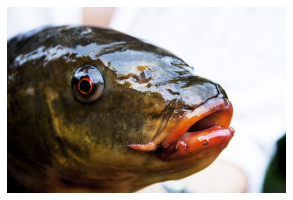

In [ ]:
dls_5.train_ds[2315][0].show(), dls_5.train_ds[2315][1]

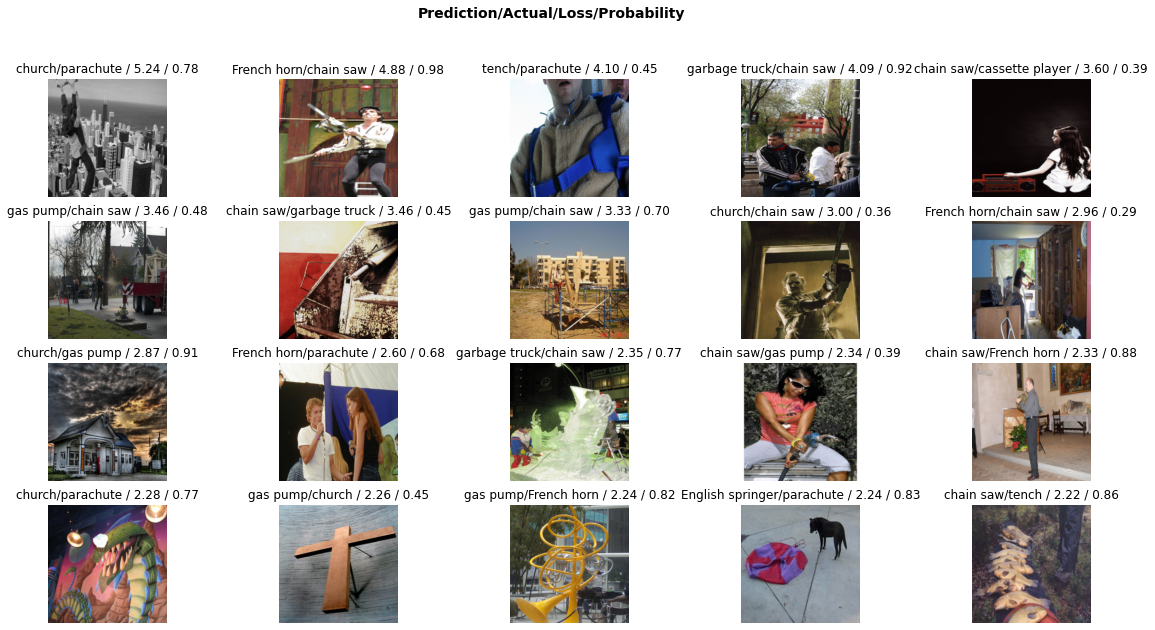

In [ ]:
interp.plot_top_losses(k=20, figsize=(20, 10))

## Get predictions for train and val dataloads

In [ ]:
#export
train_preds = learn_5.get_preds(ds_idx=0, with_decoded=True)

In [ ]:
train_preds

(tensor([[1.3731e-03, 1.3300e-03, 9.8152e-01,  ..., 1.0056e-03, 1.1169e-03,
          2.9588e-03],
         [3.6503e-03, 9.5305e-03, 8.1537e-01,  ..., 6.8630e-03, 2.2071e-02,
          6.6028e-03],
         [1.9473e-04, 7.2536e-05, 9.9713e-01,  ..., 6.6373e-04, 4.2151e-05,
          3.2498e-04],
         ...,
         [4.1621e-03, 2.2294e-02, 1.1591e-02,  ..., 4.8723e-03, 5.8460e-04,
          1.2253e-02],
         [4.3534e-06, 1.1636e-06, 5.3802e-07,  ..., 3.1808e-07, 1.1023e-04,
          9.8159e-06],
         [2.9555e-02, 1.7212e-02, 3.8437e-02,  ..., 3.7789e-02, 6.3827e-03,
          3.4245e-02]]),
 TensorCategory([2, 2, 2,  ..., 6, 6, 6]),
 tensor([2, 2, 2,  ..., 6, 6, 6]))

In [ ]:
#export
val_preds = learn_5.get_preds(ds_idx=1, with_decoded=True)

## Cleanlab

In [ ]:
#hide
#!pip install cleanlab -q

In [ ]:
#export
from cleanlab.pruning import get_noise_indices

In [ ]:
#export
train_ordered_label_errors = get_noise_indices(s=train_preds[1].numpy(), #targets
                             psx=train_preds[0].numpy(),#predictions_prob
                             sorted_index_method='normalized_margin')

In [ ]:
#exporti
print("We found {} label errors.".format(len(train_ordered_label_errors))) 

We found 208 label errors.


In [ ]:
#export
noisy_train = train_df.loc[train_ordered_label_errors]

In [ ]:
test_eq(205, len(noisy_train[noisy_train.noisy_labels_0 != noisy_train.noisy_labels_5]))

In [ ]:
test_eq(3, len(noisy_train[noisy_train.noisy_labels_0 == noisy_train.noisy_labels_5]))
noisy_train[noisy_train.noisy_labels_0 == noisy_train.noisy_labels_5]

,path,noisy_labels_0,noisy_labels_1,noisy_labels_5,noisy_labels_25,noisy_labels_50,is_valid
2789,train/n01440764/n01440764_11063.JPEG,n01440764,n01440764,n01440764,n01440764,n03445777,False
8885,train/n03425413/n03425413_11029.JPEG,n03425413,n03425413,n03425413,n02102040,n03425413,False
1523,train/n03417042/n03417042_3679.JPEG,n03417042,n03417042,n03417042,n03417042,n03888257,False


Out of 208 indices reported as noisy, 205 are truly noisy and 3 are false positives (3 clean).

## 25 noice percent 

Here the validation set will not contain any incorrect labels.

In [ ]:
dblock = DataBlock(blocks=(ImageBlock, CategoryBlock),
                   get_x=ColReader('path', pref=source),
                   get_y=Pipeline([ColReader(f'noisy_labels_25'), lbl_dict.__getitem__]),
                   splitter=ColSplitter(),
                   item_tfms=[RandomResizedCrop(128, min_scale=0.35), FlipItem(0.5)],
                   batch_tfms=Normalize.from_stats(*imagenet_stats))

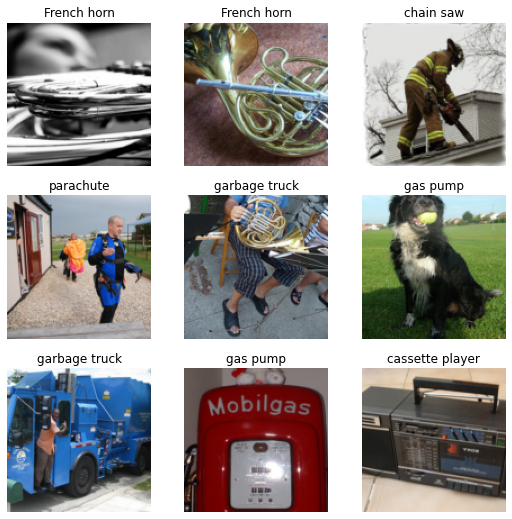

In [ ]:
dls = dblock.dataloaders(csv_file)
dls.show_batch()

In [ ]:
learn = cnn_learner(dls, resnet34, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


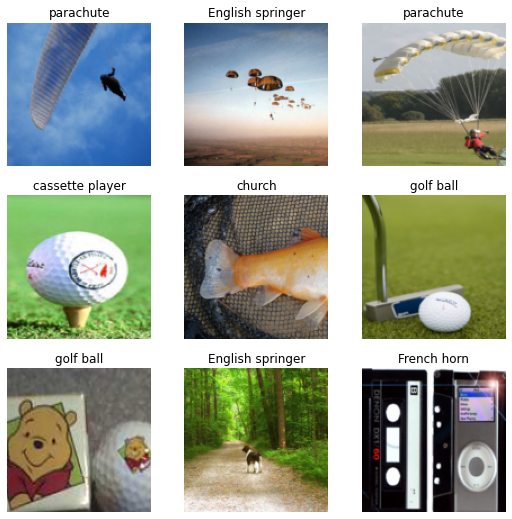

In [ ]:
dls.train.show_batch()

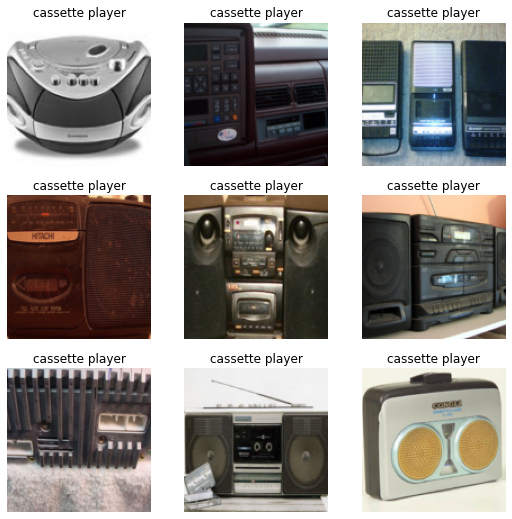

In [ ]:
dls.valid.show_batch()

SuggestedLRs(lr_min=0.006918309628963471, lr_steep=0.0030199517495930195)

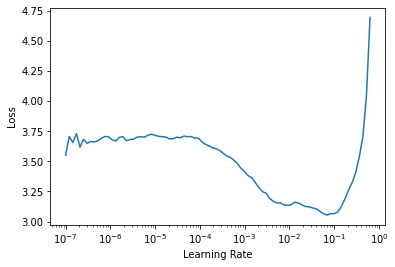

In [ ]:
learn.lr_find()

In [ ]:
learn.fit_one_cycle(5, 3e-3)

epoch,train_loss,valid_loss,accuracy,time
0,1.948211,0.512535,0.884586,01:23
1,1.547888,0.450991,0.930446,01:23
2,1.387833,0.473935,0.940382,01:22
3,1.295599,0.385814,0.949554,01:22
4,1.197416,0.409498,0.951083,01:22


In [ ]:
learn.unfreeze()

SuggestedLRs(lr_min=1.0964781722577755e-07, lr_steep=1.5848931980144698e-06)

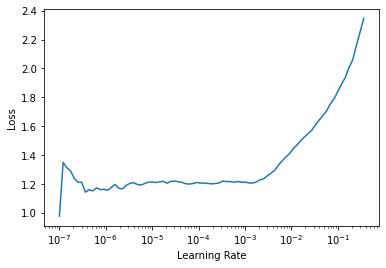

In [ ]:
learn.lr_find()

In [ ]:
learn.fit_one_cycle(3, slice(1e-6, 1e-3))

epoch,train_loss,valid_loss,accuracy,time
0,1.220114,0.427654,0.949299,01:25
1,1.220826,0.433591,0.949045,01:25
2,1.101860,0.394963,0.951592,01:25


Even though our dataset has 25% incorrect labels present, we still managed to achieve 95% accuracy.

## 50 noise percent

In [ ]:
dls_50 = get_dls(csv_file, 50)

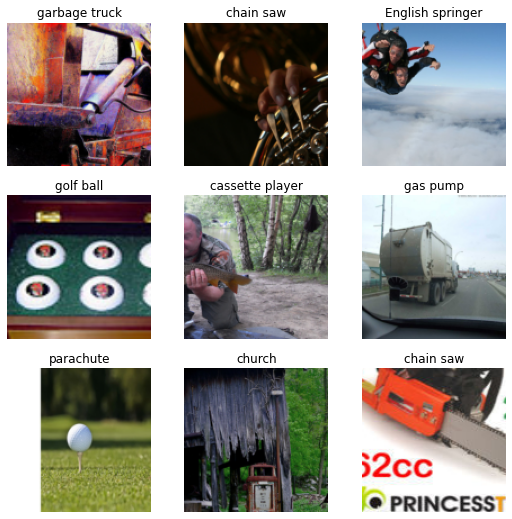

In [ ]:
dls_50.show_batch()

In [ ]:
learn_50 = cnn_learner(dls_50, resnet34, metrics=accuracy)

SuggestedLRs(lr_min=0.004786301031708717, lr_steep=0.0006918309954926372)

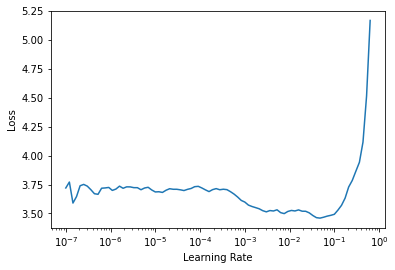

In [ ]:
learn_50.lr_find()

In [ ]:
learn_50.fine_tune(epochs=3, freeze_epochs=5, base_lr=4e-3)

epoch,train_loss,valid_loss,accuracy,time
0,2.908580,0.790149,0.817070,01:22
1,2.523659,0.874419,0.825478,01:23
2,2.199923,0.897595,0.868535,01:22
3,2.071265,0.914389,0.871083,01:24
4,2.049342,0.862465,0.900892,01:22


epoch,train_loss,valid_loss,accuracy,time
0,1.985508,0.979482,0.849936,01:25
1,1.905314,0.852328,0.909045,01:25
2,1.723611,0.827393,0.912866,01:24


With dataset having 50% incorrect labels present, we still managed to achieve 91% accuracy.